# Big Data 1 Praktikum 2

In [1]:
from pydrill.client import PyDrill
import os
import json
from pprint import pprint
from dotenv import load_dotenv

### Connect mit .env
Hatte Probleme mit anderer Variante

In [2]:
def connect(drill_host: str = 'earth.bigdata.fh-aachen.de'):
    auth_string = os.getenv('DRILL_USERNAME') + ":" + os.getenv('DRILL_PASSWORD')
    drill = PyDrill(host=drill_host, port=8047, use_ssl=True, verify_certs=True, auth=auth_string)

    if drill.is_active():
        print(f'connected to: {drill_host} as user {os.getenv("DRILL_USERNAME")}')
        return drill

    print("Did you place the .env file in the current folder? double-check file contents.")
    return None

In [3]:
load_dotenv()

True

In [4]:
print(os.getenv('DRILL_USERNAME'))
print(os.getenv('DRILL_PASSWORD'))
print(os.getenv('DRILL_HOSTNAME'))

bda1_mr8631s
qDZ7mEZ_XxgVBrNyS
earth.bigdata.fh-aachen.de


In [5]:
drill = connect(os.getenv('DRILL_HOSTNAME',''))

connected to: earth.bigdata.fh-aachen.de as user bda1_mr8631s


# Aufgabe a)
Datenbank/Schema wählen

"show databases/schema;" um alle zu sehen

In [34]:
result = drill.query('''use dfs.data''')
#pprint(result.__dict__)

show files; um Dateien zu sehen => test.tsv wählen <br>
spalten mit columns[x] anwählbar

In [7]:
result = drill.query('''show files''')
#pprint(result.__dict__)

Zeige Spaltennamen

In [8]:
result = drill.query('''select * from `co2data.tsv` limit 1''')
for x in result:
    print(x)

{'columns': ['measurement_count', 'serial_number', 'version', 'co2_ppm', 'temperature_celsius', 'relative_humidity_percent', 'timestamp']}


a1) Wieviele verschiedene Sensoren (angegeben im Feld serial number
) enhält
die Datenmenge?

In [9]:
result = drill.query('''select count(distinct columns[1]) as sensoren from `co2data.tsv`''')
for x in result:
    print(x)

{'sensoren': 23}


a2) Wieviele Datenpunkte je Sensor liegen vor?

In [10]:
result = drill.query('''select distinct(columns[1]) as sensor, count(columns[3]) as datapunkte from `co2data.tsv` group by columns[1] order by datapunkte asc ''',30)
for x in result:
    print(x)

{'sensor': 's_8caab57c3e19_', 'datapunkte': 1}
{'sensor': 'serial_number', 'datapunkte': 1}
{'sensor': 's_d8bfc0147061_', 'datapunkte': 1}
{'sensor': 's_3c6105d3abae_', 'datapunkte': 2}
{'sensor': 's_10521c01cf19_', 'datapunkte': 2}
{'sensor': 's_e8db84c5f771_', 'datapunkte': 2}
{'sensor': 's_8caab57a6dd9_', 'datapunkte': 6}
{'sensor': 's_8caab57cc961_', 'datapunkte': 7}
{'sensor': 's_8caab57a6dd9', 'datapunkte': 11}
{'sensor': 's_e8db84c5f33d_', 'datapunkte': 13}
{'sensor': 's_8caab57a6dd9_0xdeadbeef', 'datapunkte': 49}
{'sensor': 's_e8db84c5f33d', 'datapunkte': 83}
{'sensor': 's_e8db84c5f33d_0xdeadbeef', 'datapunkte': 1515}
{'sensor': 's_10521c0202ab_284839', 'datapunkte': 2064}
{'sensor': 's_10521c01cf19_262520', 'datapunkte': 385103}
{'sensor': 's_d8bfc0147061_283903', 'datapunkte': 578456}
{'sensor': 's_8caab57cc961_284337', 'datapunkte': 1131861}
{'sensor': 's_3c6105d3abae_299589', 'datapunkte': 1533917}
{'sensor': 's_8caab57c3e19_282028', 'datapunkte': 1561045}
{'sensor': 's_e8d

a3) Was ist der höchste, und was der niedrigste Temperaturwert?


In [11]:
result = drill.query('''select max(cast(columns[4] as decimal(100,2))) as temp_max , min(cast(columns[4] as decimal(100,2))) as temp_min  from `co2data.tsv` where isnumeric(columns[4]) = 1''',20)
for x in result:
    print(x)

{'temp_max': 36.0, 'temp_min': -1.0}


a4) Was ist der durchschnittliche Co2-Wert (co2 ppm) je Sensor? (falls der
Sensor Co2-Werte liefert)


In [44]:
result = drill.query('''select columns[1] as sensor, avg(cast(columns[3] as decimal(100,2))) as avg_co2 from `co2data.tsv` where isnumeric(columns[3] ) = 1 group by sensor order by avg_co2 desc ''',20)
for x in result:
    print(x)

{'sensor': 's_e8db84c5f33d', 'avg_co2': 1403.228916}
{'sensor': 's_8caab57a6dd9_', 'avg_co2': 983.666667}
{'sensor': 's_e8db84c5f771_300390', 'avg_co2': 954.087763}
{'sensor': 's_8caab57c3e19_282028', 'avg_co2': 876.931584}
{'sensor': 's_e8db84c5f771_', 'avg_co2': 863.0}
{'sensor': 's_3c6105d3abae_299589', 'avg_co2': 833.976671}
{'sensor': 's_3c6105d3abae_', 'avg_co2': 832.0}
{'sensor': 's_d8bfc014724e_262793', 'avg_co2': 770.455495}
{'sensor': 's_d8bfc0147061_', 'avg_co2': 722.0}
{'sensor': 's_8caab57a6dd9_288065', 'avg_co2': 654.238816}
{'sensor': 's_d8bfc0147061_283903', 'avg_co2': 628.633917}
{'sensor': 's_8caab57c3e19_', 'avg_co2': 620.0}
{'sensor': 's_e8db84c5f33d_281913', 'avg_co2': 531.210462}
{'sensor': 's_10521c01cf19_262520', 'avg_co2': 500.677816}
{'sensor': 's_e8db84c5f33d_', 'avg_co2': 488.769231}
{'sensor': 's_8caab57cc961_284337', 'avg_co2': 470.793016}
{'sensor': 's_10521c01cf19_', 'avg_co2': 467.5}
{'sensor': 's_10521c0202ab_284839', 'avg_co2': 436.763566}
{'sensor': 

a5) Wieviele Datenpunkte mit fehlenden Co2-Werten liegen vor?<br>
 1. Nur null Werte <br>
 2. -1 und null

In [13]:
result = drill.query('''select count(columns[3]) as ungültig_null from `co2data.tsv` where columns[3] like 'null' ''', 30)
for x in result:
    print(x)

{'ungültig_null': 19}


In [14]:
result = drill.query('''select count(columns[3]) as ungültig_ganz from `co2data.tsv` where columns[3] like 'null' or columns[3] like '-1' ''', 30)
for x in result:
    print(x)

{'ungültig_ganz': 1583}


# Aufgabe b) 
bereiten Sie per SELECT Query die Werte in einzelnen Spalten so vor, dass
sie sinnvolle Datentypen aufweisen

b1)  Sowohl relative humidity percent, temperature celsius als auch co2 ppm sollen als auf zwei Nachkommastellen gerundete Fließkommazahlen verfügbar sein.<br>
SQL kennt standardmäßig die Methode CAST und Drill bietet darüberhinaus CONVERT TO und CONVERT FROM an. Sie können darüber in der Dokumentation lesen.
Nutzen Sie einen geeigneten Weg.<br><br>Ausgabe von co2:

In [15]:
result = drill.query('''select cast(columns[3] as decimal(128,2)) as co2ppm from `co2data.tsv` where isnumeric(columns[3]) = 1 limit 3 ''', 30)
for x in result:
    print(x)
    

{'co2ppm': 420.0}
{'co2ppm': 421.0}
{'co2ppm': 420.0}


Ausgabe der Temperatur:

In [16]:
result = drill.query('''select cast(columns[4] as decimal(128,2)) as temperature from `co2data.tsv` where isnumeric(columns[4]) = 1 limit 3 ''', 30)
for x in result:
    print(x)

{'temperature': 23.0}
{'temperature': 24.0}
{'temperature': 24.0}


Ausgabe der Feuchtigkeit:

In [17]:
result = drill.query('''select cast(columns[5] as decimal(128,2)) as humidity_perc from `co2data.tsv` where isnumeric(columns[5]) = 1 limit 3 ''', 30)
for x in result:
    print(x)

{'humidity_perc': 36.0}
{'humidity_perc': 32.0}
{'humidity_perc': 32.0}


b2)  Die Spalte `timestamp` gibt den Zeitstempel als Unix Epoch an. Machen
Sie daraus einen Drill Timestamp.<br>
Die Dokumentation von Drill bietet unter Anderem einen Hinweis auf die nützliche
Funktion TO TIMESTAMP().

In [18]:
result = drill.query('''select to_timestamp(cast(columns[6] as int)) as time_stamp from `co2data.tsv` where isnumeric(columns[6]) = 1 limit 3 ''', 30)
for x in result:
    print(x)

{'time_stamp': 1617278928000}
{'time_stamp': 1617278936000}
{'time_stamp': 1617278939000}


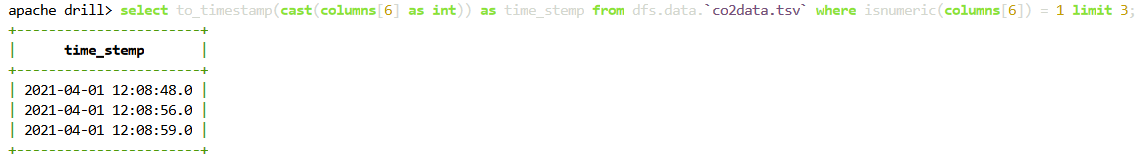
In PyDrill führt dies zu Problemen

# Aufgabe c)
Uberführen Sie die zuvor erzeugte Query in eine wiederverwendbare View:

c1) Die View sollte Ihnen die Daten als benannte Spalten im gewünschten
Datenformat anbieten und den ersten Eintrag (die alte Kopfzeile)  ̈uberspringen,
so dass nur noch Daten zur ̈uckgegeben werden.

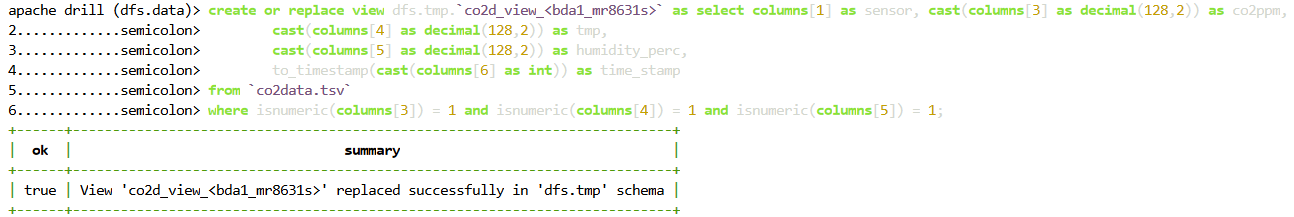

c2) Die View muss unter dem Pfad dfs.tmp.`co2 view <drill-username>`
abgelegt werden. Prüfen Sie, ob die View tats ̈achlich funktioniert und
korrigieren Sie sie falls nötig.<br>
Der ‘tmp‘ Workspace ist schreibbar für Sie, nutzen Sie das jedoch nur für CREATE
VIEW Statements. Der Drill-Username ist der Ihnen per E-Mail zugeteilte. Beispiel:
dfs.tmp.`co2 view ab1337s

In [29]:
result = drill.query('''select * from dfs.tmp.`co2d_view_<bda1_mr8631s>` limit 1''')
for x in result:
    print(x)

{'sensor': 's_d8bfc014724e_262793', 'co2ppm': 420.0, 'tmp': 23.0, 'humidity_perc': 36.0, 'time_stamp': 1617278928000}


c3) Demonstrieren Sie die Nutzung Ihrer View, indem Sie die 5 wärmsten
Zeitpunkte (Temperatur, Zeitpunkt und Sensor) jedes Sensors ausgeben.

In [45]:
result = drill.query('''select row_number() from `co2data.tsv` limit 1''', 50)
for x in result:
    print(x)